# Prediksi Risiko Kesehatan Ibu

## Pendahuluan

Risiko kematian Ibu terdiri dari banyak faktor Usia, Tekanan Darah Sistolik (TD Sistolik), TD Diastolik (TD Diastolik), Gula Darah (GD), Suhu Tubuh (BodyTemp), Denyut Jantung, dan Tingkat Risiko. Semua ini merupakan faktor risiko yang bertanggung jawab dan signifikan terhadap kematian ibu, yang merupakan salah satu perhatian utama SDG PBB.Data Oleh karena itu, perlu ditemukannya sebuah prediksi yang memiliki tingkat akurasi yang tinggi sebagai landasan informasi terkait dengan risiko kematian yang dialami oleh Ibu.

## Data Understanding

Dataset diambil dari link dibawh ini:

https://archive.ics.uci.edu/dataset/863/maternal+health+risk

Data telah dikumpulkan dari berbagai rumah sakit, klinik masyarakat, perawatan kesehatan ibu dari daerah pedesaan Bangladesh melalui sistem pemantauan risiko berbasis IoT.

## Pengambilan Data

Mengambil data pada site UCI, perlu untuk menginstall package yang telah disediakan oleh UCI Dataset. Instalasi dilakukan berguna untuk menarik data yang berasal dari UCI dataset agar dapat diolah. peritah untuk mengambil data dari UCI dataset dapat di lihat ketika menekan tombol import in python pada datase yang diinginkan dan ikuti perintah tersebut agar data dapat diambil dari UCI dataset. Contoh pengambilan data dari UCI dataset dapat dilihat pada gambar dan perintah berikut:

In [1]:
#install librari ucimlrepo
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
maternal_health_risk = fetch_ucirepo(id=863)

# data (as pandas dataframes)
X = maternal_health_risk.data.features
y = maternal_health_risk.data.targets

# Menggabungkan fitur dan target menjadi satu dataframe
data = maternal_health_risk.data.original

# Menyimpan dataset asli ke dalam file CSV
data.to_csv("yeast_dataset.csv", index=False)

# Menampilkan informasi tentang kolom dan tipe datanya
print(data.info())

# Menampilkan 5 baris pertama dari dataset
print(data.head())

# Menampilkan metadata (informasi deskriptif dataset)
print("\nMetadata:")
print(maternal_health_risk.metadata)

# Menampilkan informasi tentang variabel (fitur dan target)
print("\nInformasi Variabel:")
print(maternal_health_risk.variables)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB
None
   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86  high risk
1   35         140           90  13.0      98.0         70  high risk
2   29          90           70   8.0     100.0         80  high risk
3   30         140           85   7.0      98.0         70  high risk
4   35         120           60   6.1      98.0         76   low risk

Metadata:
{'uci_id': 863, '

## Eksplorasi Data

In [3]:
display(data)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


### Struktur Dataset

#### Fitur dan Label

##### Ukuran Dataset

In [4]:
# ukuran fitur
data.shape

(1014, 7)

Berdasarkan hasil display tersebut dapat disimpulkan bahwa dataset Risiko Kesehatan Ibu memiliki 1014 data dan memiliki 7 kolom atau fitur

##### Jumlah Kolom Dataset

In [5]:
# jumlah kolom
data.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

Fitur merupakan sebuah atribut atau variabel yang dapat menentukan hasil prediksi atau clustering nantinya.

Fitur yang terdapat pada dataset:
- Age : 	Segala usia dalam tahun ketika seorang wanita sedang hamil.

- SystolicBP : Nilai atas Tekanan Darah dalam mmHg, atribut penting lainnya selama kehamilan.

- DiastolicBP : 	Nilai Tekanan Darah yang lebih rendah dalam mmHg, atribut penting lainnya selama kehamilan

- BS : Kadar glukosa darah dinyatakan dalam konsentrasi molar

- BodyTemp : Nilai suhu tubuh dari Ibu.

- HeartRate : Denyut jantung istirahat normal.

- RiskLevel : Tingkat Intensitas Risiko yang Diprediksi selama kehamilan dengan mempertimbangkan atribut sebelumnya.


##### Tipe data dari masing - masing Fitur Dataset

In [6]:
# tipe data
data.dtypes

,0
Age,int64
SystolicBP,int64
DiastolicBP,int64
BS,float64
BodyTemp,float64
HeartRate,int64
RiskLevel,object


Tipe Data fitur yang terdapat pada dataset:
- Age : Integer (Numerik).

- SystolicBP : Integer (Numerik).

- DiastolicBP : Integer (Numerik).

- BS : Float (Numerik).

- BodyTemp : Float (Numerik).

- HeartRate : Integer (Numerik).

- RiskLevel : Object berisi string Label.

#### Identifikasi Kualitas dari Dataset

##### Deteksi Missing Value

Dalam proses analisis data, langkah awal yang sangat penting adalah melakukan deteksi terhadap missing value, yaitu nilai-nilai yang tidak tercatat atau tidak tersedia dalam dataset. Deteksi ini bertujuan untuk mengidentifikasi data yang tidak lengkap, yang dapat memengaruhi akurasi hasil analisis statistik maupun performa model machine learning.

Cara Penanganan jika terdapat Missing Value:
- Mengabaikan dan membuang Missing Data
- Estimasi Parameter
- Imputasi

In [7]:
import pandas as pd

# Detect rows with missing values
rows_with_missing = data[data.isnull().any(axis=1)]
print("Detect Missing Values:")
print(rows_with_missing)

# Detect missing values atau null
missing_values = data.isnull()

# Hitung nilai yang hilang di setiap kolom
missing_counts = missing_values.sum()

# Display missing value counts
print("Missing Value Counts:")
print(missing_counts)

Detect Missing Values:
Empty DataFrame
Columns: [Age, SystolicBP, DiastolicBP, BS, BodyTemp, HeartRate, RiskLevel]
Index: []
Missing Value Counts:
Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64


Berdasarkan hasil pencarian missing value setiap fitur di dataset disimpulkan bahwa setiap fitur terbebas dari missing value dalam artian dataset sudah dalam keadaan bersih

##### Deteksi Data Outlier

Deteksi outlier adalah proses untuk mengidentifikasi data yang memiliki perilaku atau karakteristik yang sangat berbeda dari sebagian besar data lainnya dalam suatu dataset. Outlier, atau pencilan, merupakan titik data yang jauh menyimpang dari pola umum dan dapat muncul karena berbagai alasan, seperti kesalahan pencatatan, kondisi khusus, atau memang fenomena nyata yang jarang terjadi.

Dalam konteks analisis data, keberadaan outlier sangat penting untuk diperhatikan karena dapat mempengaruhi hasil analisis statistik dan performa model machine learning. Misalnya, dalam regresi linear, satu outlier yang ekstrem dapat menyebabkan garis prediksi menjadi sangat miring dan tidak akurat.

**Salah satu metode untuk deteksi Outlier data yakni metode LOF:**

Local Outlier Factor (LOF) adalah sebuah metode deteksi outlier berbasis kepadatan lokal yang dirancang untuk mengidentifikasi titik data yang memiliki perilaku menyimpang dibandingkan dengan lingkungan sekitarnya. Metode ini diperkenalkan untuk mengatasi keterbatasan pendekatan tradisional yang hanya mengandalkan jarak global tanpa mempertimbangkan variasi lokal dalam distribusi data.

Proses LOF dimulai dengan memilih parameter k yang merepresentasikan jumlah tetangga terdekat yang akan dipertimbangkan. Kemudian, untuk setiap titik data, algoritma menghitung jarak ke tetangga-tetangganya dan menentukan tingkat kepadatan lokal berdasarkan seberapa dekat atau jauh tetangga-tetangga tersebut.

$$
\text{LOF}_k(p) = \frac{1}{|\mathcal{N}_k(p)|} \sum_{o \in \mathcal{N}_k(p)} \frac{\text{lrd}_k(o)}{\text{lrd}_k(p)}
$$

Keterangan:
- \( $mathcal{N}_k(p) $) adalah himpunan **k tetangga terdekat** dari $( p $)
- \( $text{lrd}_k(p) $) adalah **local reachability density** dari $( p $)

di mana:

$$
\text{lrd}_k(p) = \left( \frac{1}{|\mathcal{N}_k(p)|} \sum_{o \in \mathcal{N}_k(p)} \max \left\{ \text{dist}(p, o),\ \text{k-dist}(o) \right\} \right)^{-1}
$$


Keterangan:
- \( $text{dist}(p, o) $) = jarak antara titik $( p $) dan tetangganya $( o $)
- \( $text{k-dist}(o) $) = jarak dari $( o $) ke tetangga ke-k
- Fungsi `max{}` digunakan agar tidak terlalu sensitif terhadap outlier yang jauh.


###### Implementasi Code

In [8]:
from sklearn.neighbors import LocalOutlierFactor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# select data numerik
X = data.select_dtypes(include=['float64', 'int64'])

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)

y_pred = lof.fit_predict(X)
data['outlier'] = y_pred
print(data['outlier'].value_counts())

outlier
 1    965
-1     49
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


Hasil Pengujian Outlier terhadap dataset disimpulkan bahwa tedapat 49 data yang teindikasi Outlier yang disimbolkan dengan angka (-1) dari total 1014 data.

#### Visualisasi Data

/tmp/ipython-input-11-240362579.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RiskLevel', data=data, palette='viridis')


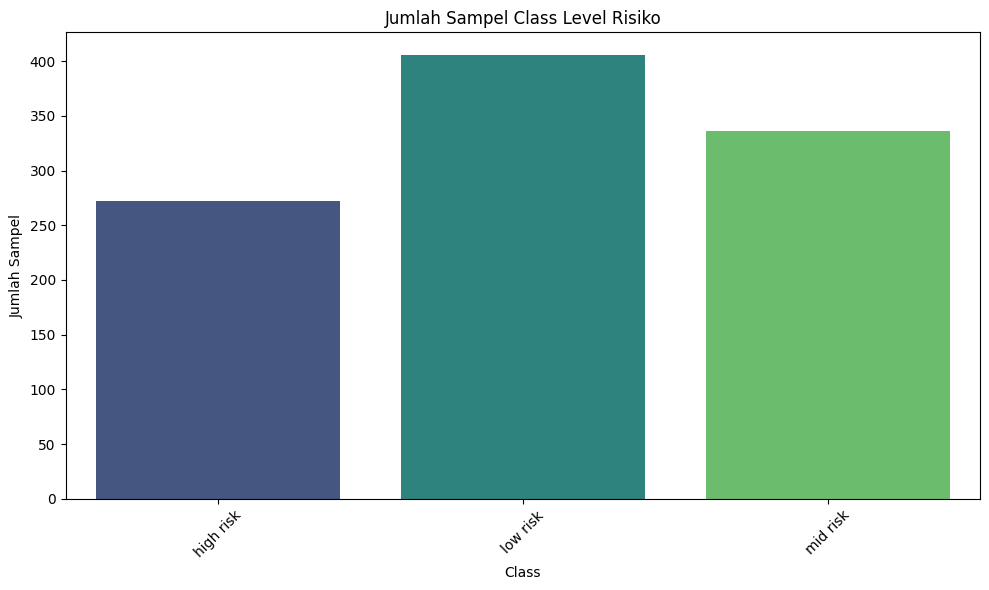

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='RiskLevel', data=data, palette='viridis')
plt.title('Jumlah Sampel Class Level Risiko')
plt.xlabel('Class')
plt.ylabel('Jumlah Sampel')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1200x1000 with 0 Axes>

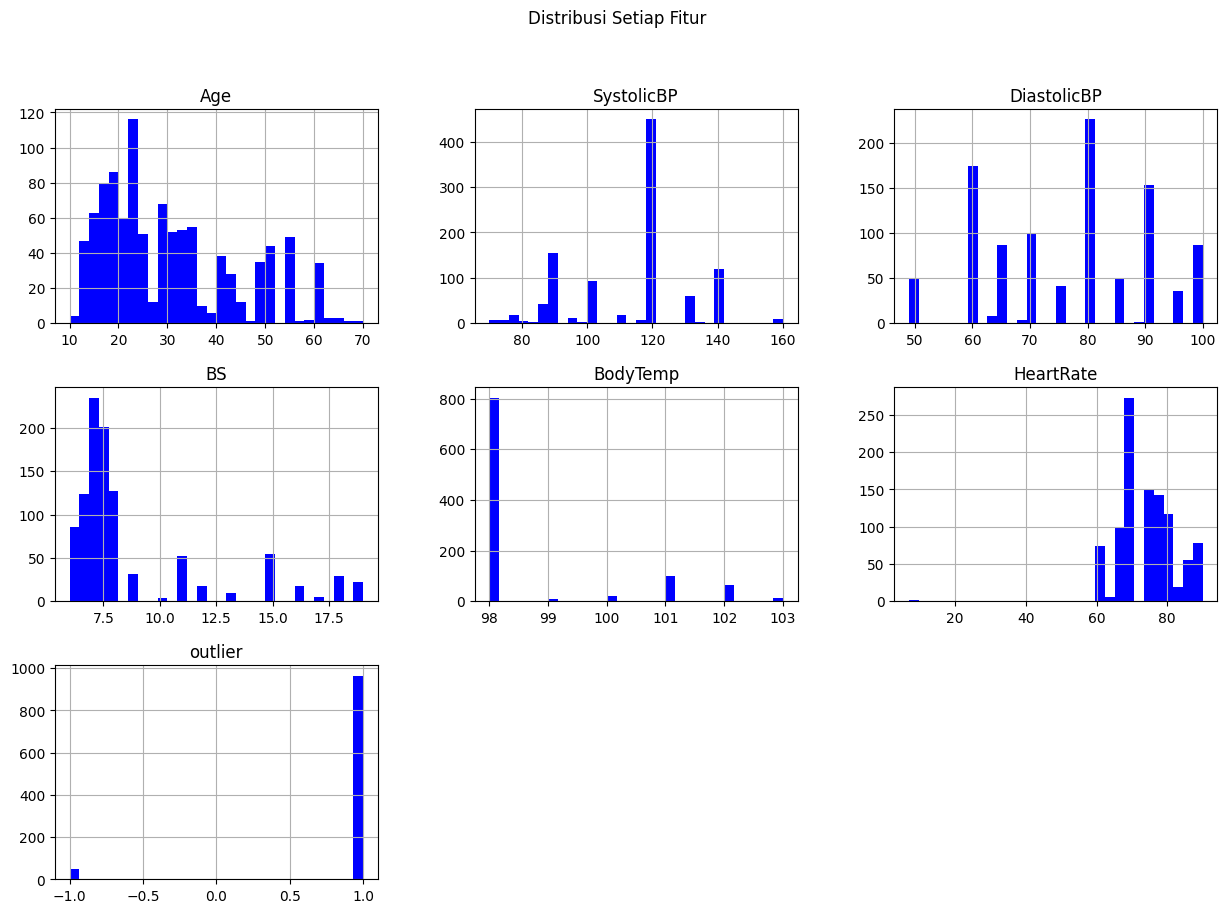

In [12]:
plt.figure(figsize=(12, 10))
data.hist(bins=30, figsize=(15, 10), color='blue')
plt.suptitle('Distribusi Setiap Fitur')
plt.show()

## Prepocessing Data

### Mengahapus Outlier Pada Data

Setelah ditemukan 49 outlier menggunakan metode LOF, Diperlukan adnaya cleaning Data agar tidak mempengaruhi nilai akurasi dari hasil Klasifikasi pada setiap Modelling-nya.

Keterangan Outlier

- Data Outlier disimbolkan dengan (-1)
- Non Outlier (1)

In [13]:
# mengambil data yang bukan -1
data_clean = data[data['outlier'] == 1].copy()

# menghapus column outlier
data_clean.drop(columns='outlier', inplace=True)

print("Jumlah data awal:", len(data))
print("Jumlah data setelah outlier dihapus:", len(data_clean))

Jumlah data awal: 1014
Jumlah data setelah outlier dihapus: 965


Setelah dilakukannya Cleaning Data terdapat 965 sisa data yang bersih dari outliernya.

### Min-Max Scaler


Berdasarkan proses data understanding sebelumnya terdapat fitur yang memiliki tipe data yang berdeda yakni integer dan float, oleh karena itu perlu dilakukannya proses normalisasi agar data memiliki range yang sama dan tidak memiliki interval yang telalu tinggi. Normalisasinya dapat menggunakan Min-Max Scaler. Min-Max Scaler adalah salah satu metode normalisasi data yang bertujuan untuk mengubah skala fitur numerik agar berada dalam rentang tertentu, umumnya antara 0 dan 1. Teknik ini digunakan agar semua fitur memiliki kontribusi yang seimbang saat digunakan oleh algoritma pembelajaran mesin.


$$
X_{\text{scaled}} = \frac{X - X_{\min}}{X_{\max} - X_{\min}}
$$

Keterangan:
- $(X$) = nilai asli
- $(X_{\min}$) = nilai minimum dari fitur
- $(X_{\max}$) = nilai maksimum dari fitur
- $(X_{\text{scaled}}$) = nilai hasil normalisasi (antara 0 dan 1)

In [14]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 1. Ambil hanya fitur numerik
X = data_clean[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']]

scaler = MinMaxScaler()

# 3. Fit dan transform data
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# 4. Menggabungkan class ke fitur yang telah di normalisasi
data_scaled = pd.concat([X_scaled_df, data_clean['RiskLevel'].reset_index(drop=True)], axis=1)

print(data_scaled.head())

        Age  SystolicBP  DiastolicBP        BS  BodyTemp  HeartRate  RiskLevel
0  0.416667    0.777778     0.803922  0.538462       0.0   0.333333  high risk
1  0.316667    0.222222     0.411765  0.153846       0.4   0.666667  high risk
2  0.333333    0.777778     0.705882  0.076923       0.0   0.333333  high risk
3  0.416667    0.555556     0.215686  0.007692       0.0   0.533333   low risk
4  0.216667    0.777778     0.607843  0.077692       0.0   0.333333  high risk


## Modelling

Proses modeling adalah merupakan suatu tahapan dalam analisis data, di mana kita membangun sebuah model matematis atau algoritma pembelajaran mesin yang dapat mengenali pola dari data, dan menggunakannya untuk membuat prediksi atau keputusan otomatis.

Tujuan dari proses ini adalah untuk mengubah data mentah yang telah diprepocessing menjadi sebuah model yang dapat belajar dari data, lalu digunakan untuk memecahkan masalah tertentu, seperti klasifikasi, regresi, deteksi outlier, dsb.

### Modelling Klasifikasi Menggunakan Naive Bayes

Pada saat ini, proses modelling akan menggunakan metode Naive Bayes untuk proses Klasifikasinya.

**Naive Bayes** adalah salah satu metode klasifikasi yang sederhana namun sangat efektif dalam dunia pembelajaran mesin (machine learning). Metode ini bekerja berdasarkan prinsip probabilitas, khususnya Teorema Bayes, yang digunakan untuk memperkirakan kemungkinan suatu data termasuk ke dalam sebuah kelas tertentu.

Ciri khas dari metode ini adalah anggapan bahwa setiap fitur (atau atribut) pada data bersifat saling independen, artinya kemunculan satu fitur tidak dipengaruhi oleh fitur lainnya. Meskipun anggapan ini sering kali tidak sepenuhnya benar dalam kenyataan, pendekatan “naive” ini justru membuat perhitungan menjadi lebih sederhana dan efisien, serta tetap menghasilkan performa yang kompetitif dalam banyak kasus.


Teorema Bayes:

$$
P(C \mid X) = \frac{P(X \mid C) \cdot P(C)}{P(X)}
$$


Keterangan:
- $( P(C \mid X) $): **Posterior** – probabilitas kelas $( C $) diberikan data $( X $)
- $( P(X \mid C) $): **Likelihood** – probabilitas data $( X $) muncul jika kelasnya \( C \)
- $( P(C) $): **Prior** – probabilitas awal kelas $( C $) sebelum melihat data
- $( P(X) $): Probabilitas keseluruhan data $( X $) (konstanta untuk semua kelas)

Langkah - Langkah Pada Modelling:

1. Pada saat Training Model akan membagi dataset menjadi dua bagian yakni 30% datset yang digunakan untuk testing dan 70% data digunakan untuk training.
2. Menghitung Probabilitas Awal
3. Menghitung Persebaran data / Standar Deviasi.
4. Menghitung Distribusi Gaussian.
5. Mnenghitung Posterior.

#### Latih Model

In [15]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from ucimlrepo import fetch_ucirepo

# memisahkan atribut dan label
X = data_scaled[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']]
y = data_scaled['RiskLevel']

# Membagi dataset menjadi data latih & data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

# membuat model Gaussian naive bayes
model_gnb = GaussianNB()

# Melatih model dengan menggunakan data latih
train = model_gnb.fit(X_train, y_train)

#### Proses Klasifikasi

Proses Klasifikasinya menggunakan data testing yang telah dipisah sebesar 30%.

In [18]:
y_pred = model_gnb.predict(X_test)
hasil_klasifikasi = X_test.copy()  # ambil fitur data uji
hasil_klasifikasi['label_Data'] = y_test.values  # label asli
hasil_klasifikasi['label_prediksi'] = y_pred

print(hasil_klasifikasi)

          Age  SystolicBP  DiastolicBP        BS  BodyTemp  HeartRate  \
953  0.833333    0.555556     0.705882  0.692308       0.0   0.000000   
278  0.116667    0.222222     0.313725  0.130769       1.0   0.233333   
14   0.666667    0.777778     0.803922  0.692308       0.0   1.000000   
680  0.050000    0.222222     0.313725  0.146154       0.6   0.666667   
338  0.033333    0.277778     0.215686  0.069231       0.0   0.166667   
..        ...         ...          ...       ...       ...        ...   
519  0.366667    0.777778     0.803922  0.923077       0.0   0.933333   
20   0.183333    0.222222     0.313725  0.115385       0.0   0.533333   
873  0.150000    0.222222     0.411765  0.115385       0.0   0.666667   
746  0.150000    0.555556     0.803922  0.061538       0.0   0.000000   
385  0.200000    0.333333     0.313725  0.138462       0.0   0.666667   

    label_Data label_prediksi  
953  high risk      high risk  
278  high risk       mid risk  
14   high risk      high ri

#### Evaluasi

In [17]:
acc_gnb = accuracy_score(y_test, y_pred)
prec_gnb = precision_score(y_test, y_pred, average='weighted', zero_division=0)
rec_gnb = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1_gnb = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# Menampilkan hasil evaluasi
print(f"Akurasi     : {acc_gnb:.2f}")
print(f"Presisi     : {prec_gnb:.2f}")
print(f"Recall      : {rec_gnb:.2f}")
print(f"F1 Score    : {f1_gnb:.2f}")

Akurasi     : 0.62
Presisi     : 0.61
Recall      : 0.62
F1 Score    : 0.58


#### Uji Coba Prediksi

In [30]:
# data yang digunakan
print(data_scaled.iloc[500])
# # prediksi data
print("Hasil Uji Coba Prediksi = ", model_gnb.predict([[0.35, 0.555556, 0.215686, 0.007692,  0.0, 0.533333]]))

Age                0.35
SystolicBP     0.555556
DiastolicBP    0.215686
BS             0.007692
BodyTemp            0.0
HeartRate      0.533333
RiskLevel      low risk
Name: 500, dtype: object
Hasil Uji Coba Prediksi =  ['low risk']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


Dapat disimpulkan pada prediksi uji coba menggunakan Model Gaussian Naive Bayes pada data ke 500 itu belabel "low_risk"

### Modelling Klasifikasi Menggunakan KNN (K Nearest Neighbours)

K-Nearest Neighbors (KNN) adalah salah satu algoritma pembelajaran mesin yang digunakan untuk menyelesaikan masalah klasifikasi maupun regresi. KNN bekerja berdasarkan prinsip kesamaan atau kedekatan antara data. Algoritma ini mengklasifikasikan suatu data baru dengan melihat sejumlah tetangga terdekat (dalam hal ini sebanyak K data) dari data tersebut di ruang fitur.

Dalam proses klasifikasi, ketika sebuah data baru diberikan, KNN akan menghitung jarak antara data baru tersebut dengan seluruh data yang ada dalam dataset pelatihan. Setelah itu, KNN akan memilih K data terdekat berdasarkan jarak tersebut, lalu menentukan kelas mayoritas dari K tetangga itu sebagai prediksi label data baru.

Ketika sebuah data baru diberikan, KNN akan menghitung jarak antara data tersebut dengan semua data pelatihan, menggunakan rumus jarak seperti **Euclidean Distance**:

$$
d(x, y) = \sqrt{ \sum_{i=1}^{n} (x_i - y_i)^2 }
$$

Kemudian, algoritma akan memilih $( K $) data dengan jarak terdekat, lalu menentukan **kelas mayoritas** dari tetangga tersebut sebagai prediksi.

Langkah - Langkah Modelling dengan KNN:

1. Pengumpulan dan persiapan data : Pada kasus ini, sebelum melakukan proses training, data akan di pisah menjadi dua bagian yakni 30% untuk testing dan 70% untuk training. NIlai K yang digunakan sebanyak 6.
2. Pemilihan Parameter K : Jumlah tetangga terdekat yang akan dipertimbangkan saat membuat prediksi. Pemilihan K yang tepat sangat memengaruhi kinerja model.NIlai K yang digunakan sebanyak 6.
3. Proses Prediksi: Hitung jarak (misalnya jarak Euclidean) antara data baru ini dengan SETIAP titik data di set pelatihan. Pilih K titik data dari set pelatihan yang memiliki jarak paling kecil ke data baru tersebut. Lihat kelas dari K tetangga terdekat ini. Kelas yang paling banyak muncul di antara K tetangga tersebut akan menjadi kelas yang diprediksi untuk data baru.

#### Latih Model

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


# Memisahkan fitur dan label
X = data_scaled[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']]
y = data_scaled['RiskLevel']

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Buat model KNN dengan nilai k = 6
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

#### Proses Klasifikasi

Proses Klasifikasinya menggunakan data testing yang telah dipisah sebesar 30%.

In [20]:
y_pred_knn = knn.predict(X_test)
hasil_klasifikasi = X_test.copy()  # ambil fitur data uji
hasil_klasifikasi['label_aktual'] = y_test.values  # label asli
hasil_klasifikasi['label_prediksi'] = y_pred

print(hasil_klasifikasi)

          Age  SystolicBP  DiastolicBP        BS  BodyTemp  HeartRate  \
953  0.833333    0.555556     0.705882  0.692308       0.0   0.000000   
278  0.116667    0.222222     0.313725  0.130769       1.0   0.233333   
14   0.666667    0.777778     0.803922  0.692308       0.0   1.000000   
680  0.050000    0.222222     0.313725  0.146154       0.6   0.666667   
338  0.033333    0.277778     0.215686  0.069231       0.0   0.166667   
..        ...         ...          ...       ...       ...        ...   
519  0.366667    0.777778     0.803922  0.923077       0.0   0.933333   
20   0.183333    0.222222     0.313725  0.115385       0.0   0.533333   
873  0.150000    0.222222     0.411765  0.115385       0.0   0.666667   
746  0.150000    0.555556     0.803922  0.061538       0.0   0.000000   
385  0.200000    0.333333     0.313725  0.138462       0.0   0.666667   

    label_aktual label_prediksi  
953    high risk      high risk  
278    high risk       mid risk  
14     high risk     

#### Evaluasi

In [21]:
acc_knn = accuracy_score(y_test, y_pred_knn)
prec_knn = precision_score(y_test, y_pred_knn, average='weighted', zero_division=0)
rec_knn = recall_score(y_test, y_pred_knn, average='weighted', zero_division=0)
f1_knn = f1_score(y_test, y_pred_knn, average='weighted', zero_division=0)

# Menampilkan hasil evaluasi
print(f"Akurasi     : {acc_knn:.2f}")
print(f"Presisi     : {prec_knn:.2f}")
print(f"Recall      : {rec_knn:.2f}")
print(f"F1 Score    : {f1_knn:.2f}")

Akurasi     : 0.67
Presisi     : 0.65
Recall      : 0.67
F1 Score    : 0.66


#### Uji Coba Prediksi

In [31]:
# data yang digunakan
print(data_scaled.iloc[500])
# # prediksi data
print("Hasil Uji Coba Prediksi = ", knn.predict([[0.35, 0.555556, 0.215686, 0.007692,  0.0, 0.533333]]))

Age                0.35
SystolicBP     0.555556
DiastolicBP    0.215686
BS             0.007692
BodyTemp            0.0
HeartRate      0.533333
RiskLevel      low risk
Name: 500, dtype: object
Hasil Uji Coba Prediksi =  ['mid risk']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Dapat disimpulkan pada prediksi uji coba menggunakan Model KNN pada data ke 500 itu belabel "mid_risk"

### Modelling Klasifikasi Mennggunakan Decision Tree

Decision Tree adalah salah satu algoritma dalam pembelajaran mesin yang digunakan untuk klasifikasi maupun regresi. Algoritma ini bekerja dengan cara membagi data menjadi kelompok-kelompok berdasarkan fitur tertentu melalui serangkaian pertanyaan atau kondisi. Hasil dari proses ini membentuk struktur pohon bercabang, di mana setiap simpul internal mewakili pengujian terhadap suatu fitur, setiap cabang mewakili hasil dari pengujian tersebut, dan setiap daun (leaf) menunjukkan label kelas (pada kasus klasifikasi).


Proses pembentukan pohon dimulai dari akar (root), di mana algoritma akan memilih fitur yang paling baik dalam membagi data. Pemilihan ini biasanya didasarkan pada metrik seperti Gini Impurity atau Entropy (dalam metode ID3/C4.5). Fitur terbaik akan dipilih sebagai pemisah pada level pertama, kemudian data dibagi, dan proses ini diulang secara rekursif sampai mencapai kondisi tertentu (misalnya semua data dalam satu kelompok memiliki label yang sama, atau kedalaman maksimum pohon tercapai).

**Proses yang terdapat pada Decision Tree:**

1. Entropy (Pengukuran Ketidakteraturan)

Entropy digunakan untuk mengukur impuritas (ketidakteraturan) dalam satu set data:

$$
H(S) = - \sum_{i=1}^{n} p_i \log_2(p_i)
$$

di mana:
- $( p_i $): proporsi dari kelas ke-$(i$) dalam himpunan $(S$)
- $( H(S) $): entropy dari himpunan $(S$)


2. Information Gain (Keuntungan Informasi)

Digunakan untuk memilih fitur terbaik dalam pemisahan data:

$$
IG(S, A) = H(S) - \sum_{v \in \text{Values}(A)} \frac{|S_v|}{|S|} \cdot H(S_v)
$$

di mana:
- $( IG(S, A) $): information gain dari atribut $(A$) terhadap set $(S$)
- $( S_v $): subset dari $(S$) dengan nilai $(A = v$)


3. Gini Index (Alternatif untuk Entropy)

Digunakan dalam algoritma CART untuk mengukur impuritas:

$$
Gini(S) = 1 - \sum_{i=1}^{n} p_i^2
$$

di mana:
- $( p_i $): proporsi kelas ke-$(i$) dalam $(S$)

#### Latih Model

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Memisahkan fitur dan label
X = data_scaled[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']]
y = data_scaled['RiskLevel']

# proses memisahkan data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# menggunakan metode entropy untuk menentukan kemurnian daerah
dec_tree = DecisionTreeClassifier(criterion='entropy', random_state=0)

dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

#### Proses Klasifikasi

In [23]:
y_pred_dec_tree = dec_tree.predict(X_test)
hasil_klasifikasi = X_test.copy()  # ambil fitur data uji
hasil_klasifikasi['label_aktual'] = y_test.values  # label asli
hasil_klasifikasi['label_prediksi'] = y_pred

print(hasil_klasifikasi)

          Age  SystolicBP  DiastolicBP        BS  BodyTemp  HeartRate  \
953  0.833333    0.555556     0.705882  0.692308       0.0   0.000000   
278  0.116667    0.222222     0.313725  0.130769       1.0   0.233333   
14   0.666667    0.777778     0.803922  0.692308       0.0   1.000000   
680  0.050000    0.222222     0.313725  0.146154       0.6   0.666667   
338  0.033333    0.277778     0.215686  0.069231       0.0   0.166667   
..        ...         ...          ...       ...       ...        ...   
519  0.366667    0.777778     0.803922  0.923077       0.0   0.933333   
20   0.183333    0.222222     0.313725  0.115385       0.0   0.533333   
873  0.150000    0.222222     0.411765  0.115385       0.0   0.666667   
746  0.150000    0.555556     0.803922  0.061538       0.0   0.000000   
385  0.200000    0.333333     0.313725  0.138462       0.0   0.666667   

    label_aktual label_prediksi  
953    high risk      high risk  
278    high risk       mid risk  
14     high risk     

#### Evaluasi

In [24]:
acc_dec_tree = accuracy_score(y_test, y_pred_dec_tree)
prec_dec_trer = precision_score(y_test, y_pred_dec_tree, average='weighted', zero_division=0)
rec_dec_tree = recall_score(y_test, y_pred_dec_tree, average='weighted', zero_division=0)
f1_dec_tree = f1_score(y_test, y_pred_dec_tree, average='weighted', zero_division=0)

# Menampilkan hasil evaluasi
print(f"Akurasi     : {acc_dec_tree:.2f}")
print(f"Presisi     : {prec_dec_trer:.2f}")
print(f"Recall      : {rec_dec_tree:.2f}")
print(f"F1 Score    : {f1_dec_tree:.2f}")

Akurasi     : 0.82
Presisi     : 0.82
Recall      : 0.82
F1 Score    : 0.82


#### Visualisasi menggunakan Confussion Matrix

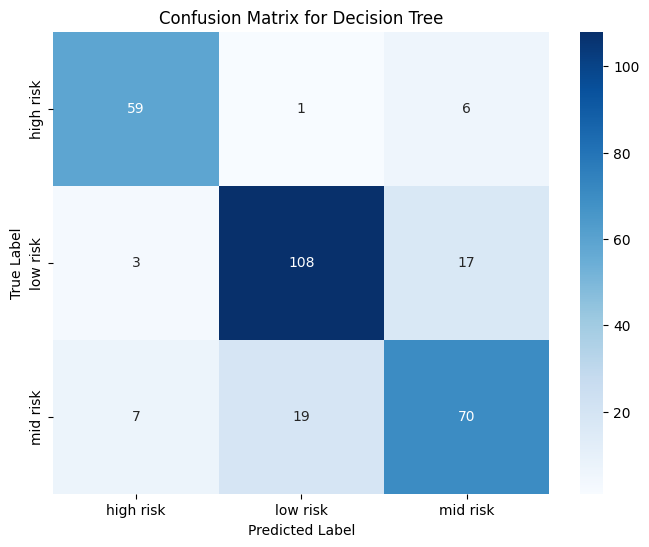

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_dec_tree)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=dec_tree.classes_,
            yticklabels=dec_tree.classes_)
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### Uji Coba Prediksi

In [32]:
# data yang digunakan
print(data_scaled.iloc[500])
# # prediksi data
print("Hasil Uji Coba Prediksi = ", dec_tree.predict([[0.35, 0.555556, 0.215686, 0.007692,  0.0, 0.533333]]))

Age                0.35
SystolicBP     0.555556
DiastolicBP    0.215686
BS             0.007692
BodyTemp            0.0
HeartRate      0.533333
RiskLevel      low risk
Name: 500, dtype: object
Hasil Uji Coba Prediksi =  ['mid risk']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Dapat disimpulkan pada prediksi uji coba menggunakan Model KNN pada data ke 500 itu belabel "mid_risk"

## Evaluasi

Hasil Akurasi setiap Model:

- Gaussian Naive Bayes : Menghasilkan Akurasi Sebesar 62%
- KNN (K - Nearest Neighbours) : Menghasilkan Akurasi Sebesar 67%
- Decision Tree : Menghasilkan Akurasi Sebesar 82%

Berdasarkan hasil analisis setiap model dapat disimpulkan bahwa Model Decision Tree memiliki tingkat akurasi yang sangat tinggi dibandingkan dengan model klasifikasi KNN atau Naive Bayes. Oleh karena itu, model Decision Tree dalam prediksi Risiko Kesehatan Ibu cocok digunakan sebagai prediksi kasus.